<a href="https://colab.research.google.com/github/Ishita95-harvad/10-000-Movies-Letterboxd-Data/blob/main/10%2C000_Movies_%2B_Letterboxd_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **10,000 Movies + Letterboxd Data**
Webscraped data from Letterboxd, including movie data and user review data


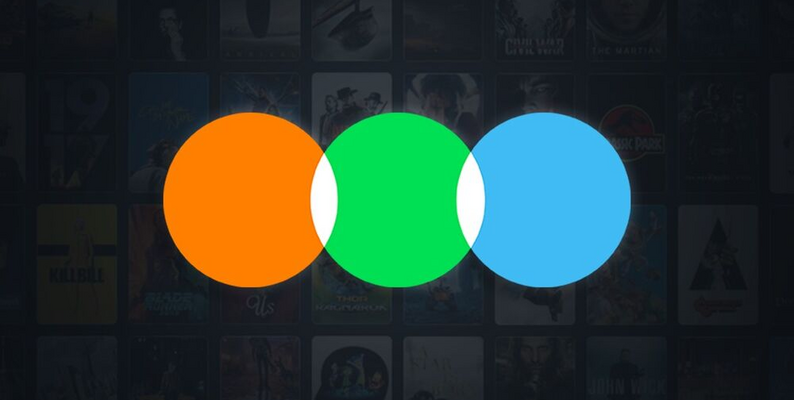



---



# Task
execute

Here is all the data you need:
"Movie_Data_File.csv"

## Data loading

### Subtask:
Load the movie data from the provided CSV file.


**Reasoning**:
Load the movie data from the provided CSV file into a pandas DataFrame and display the first 5 rows.



In [ ]:
import pandas as pd

try:
    df_movie = pd.read_csv('Movie_Data_File.csv')
    display(df_movie.head())
except FileNotFoundError:
    print("Error: 'Movie_Data_File.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,Film_title,Release_year,Director,Cast,Average_rating,Owner_rating,Genres,Runtime,Countries,Original_language,...,★½,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings,Film_URL
0,The Fan,NaN,Eckhart Schmidt,"['Désirée Nosbusch', 'Bodo Staiger', 'Simone B...",3.57,NaN,"['Horror', 'Drama']",92.0,['Germany'],German,...,103,402,525,1660,1950,2646,808,714,9042,https://letterboxd.com/film/the-fan-1982/
1,Mad Max: Fury Road,NaN,George Miller,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...",4.18,4.5,"['Adventure', 'Science Fiction', 'Action']",121.0,"['Australia', 'USA']",English,...,6139,37471,30112,158356,163753,477901,280815,511140,1682389,https://letterboxd.com/film/mad-max-fury-road/
2,Suspiria,NaN,Dario Argento,"['Jessica Harper', 'Stefania Casini', 'Flavio ...",3.93,4.0,['Horror'],99.0,['Italy'],English,...,2710,11006,14397,53427,70309,138742,60628,88628,443757,https://letterboxd.com/film/suspiria/
3,Lost in Translation,NaN,Sofia Coppola,"['Bill Murray', 'Scarlett Johansson', 'Akiko T...",3.79,4.5,"['Drama', 'Comedy', 'Romance']",102.0,"['UK', 'USA']",English,...,11281,45997,46716,155110,166638,314160,122359,193717,1076949,https://letterboxd.com/film/lost-in-translation/
4,Akira,NaN,Katsuhiro Otomo,"['Mitsuo Iwata', 'Nozomu Sasaki', 'Mami Koyama...",4.28,5.0,"['Animation', 'Action', 'Science Fiction']",124.0,['Japan'],Japanese,...,1663,7286,9544,40850,61104,168485,112657,196532,600721,https://letterboxd.com/film/akira/


## Data exploration

### Subtask:
Explore the movie data to understand its structure, identify missing values, data types, and summary statistics.


**Reasoning**:
I need to explore the data: shape, data types, summary statistics, missing values, unique values in categorical columns, distributions of numerical features, and potential outliers.



Shape of the DataFrame: (10002, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film_title         10002 non-null  object 
 1   Release_year       0 non-null      float64
 2   Director           9992 non-null   object 
 3   Cast               9945 non-null   object 
 4   Average_rating     9421 non-null   float64
 5   Owner_rating       967 non-null    float64
 6   Genres             9978 non-null   object 
 7   Runtime            9992 non-null   float64
 8   Countries          9884 non-null   object 
 9   Original_language  9999 non-null   object 
 10  Spoken_languages   9999 non-null   object 
 11  Description        10000 non-null  object 
 12  Studios            9695 non-null   object 
 13  Watches            10002 non-null  int64  
 14  List_appearances   10002 non-null  int64  
 15  Likes              10002 non-null 

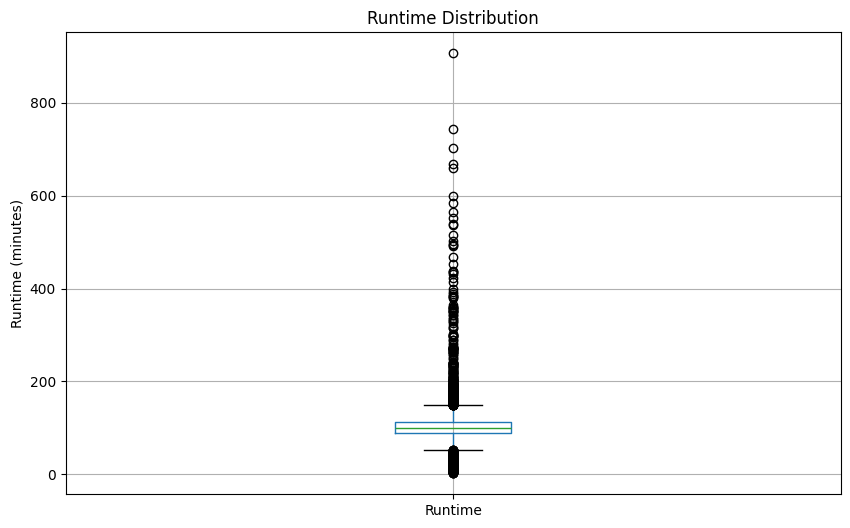

In [ ]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df_movie.shape)

# Display data types of each column
print("\nData Types:\n", df_movie.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:\n", df_movie.describe())

# Check for missing values
print("\nMissing Values:\n", df_movie.isnull().sum())

# Analyze unique values in categorical columns (example: Genres, Countries)
print("\nUnique Genres:", df_movie['Genres'].nunique())
print("\nUnique Countries:", df_movie['Countries'].nunique())
print("\nUnique Original Languages:",df_movie['Original_language'].nunique())

#Explore the distribution of numerical features
print("\nRuntime Distribution:\n",df_movie['Runtime'].describe())
# Visualization (box plot for runtime) - will need to adjust figure size if needed.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
df_movie.boxplot(column=['Runtime'])
plt.title('Runtime Distribution')
plt.ylabel('Runtime (minutes)')
plt.show()

## Data cleaning

### Subtask:
Clean the movie data by handling missing values and inconsistencies.


**Reasoning**:
Clean the data by handling missing values, inconsistent data types, duplicates, and outliers in the 'Runtime' column.



In [ ]:
# 1. Address Missing Values
# Release_Year: Drop the column as it's completely empty.
df_movie = df_movie.drop(columns=['Release_year'])

# Numerical columns (Average_rating, Runtime): Impute with the median.
for col in ['Average_rating', 'Runtime']:
    df_movie[col] = df_movie[col].fillna(df_movie[col].median())

# Categorical columns: Impute with "Unknown".
for col in ['Director', 'Genres', 'Countries', 'Original_language', 'Spoken_languages', 'Description', 'Studios']:
    df_movie[col] = df_movie[col].fillna('Unknown')


# 2. Handle Inconsistent Data Types
# Convert relevant columns to numeric types if needed.  Check for columns that appear to be numerical but are stored as objects.
for col in ['Average_rating', 'Runtime', 'Watches', 'List_appearances', 'Likes', 'Fans', 'Total_ratings']:
    if df_movie[col].dtype == 'object':
        df_movie[col] = pd.to_numeric(df_movie[col], errors='coerce')
        df_movie[col] = df_movie[col].fillna(df_movie[col].median())


# 3. Remove Duplicate Rows
# Identify and remove duplicate rows based on all columns.
df_movie = df_movie.drop_duplicates()


# 4. Outlier Detection (Runtime)
# Calculate IQR to identify potential outliers.
Q1 = df_movie['Runtime'].quantile(0.25)
Q3 = df_movie['Runtime'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers.
outliers = df_movie[(df_movie['Runtime'] < lower_bound) | (df_movie['Runtime'] > upper_bound)]
num_outliers = len(outliers)
df_movie = df_movie[(df_movie['Runtime'] >= lower_bound) & (df_movie['Runtime'] <= upper_bound)]

print(f"Number of outliers removed from Runtime: {num_outliers}")

display(df_movie.head())

Number of outliers removed from Runtime: 741


,Film_title,Director,Cast,Average_rating,Owner_rating,Genres,Runtime,Countries,Original_language,Spoken_languages,...,★½,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings,Film_URL
0,The Fan,Eckhart Schmidt,"['Désirée Nosbusch', 'Bodo Staiger', 'Simone B...",3.57,NaN,"['Horror', 'Drama']",92.0,['Germany'],German,['German'],...,103,402,525,1660,1950,2646,808,714,9042,https://letterboxd.com/film/the-fan-1982/
1,Mad Max: Fury Road,George Miller,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...",4.18,4.5,"['Adventure', 'Science Fiction', 'Action']",121.0,"['Australia', 'USA']",English,['English'],...,6139,37471,30112,158356,163753,477901,280815,511140,1682389,https://letterboxd.com/film/mad-max-fury-road/
2,Suspiria,Dario Argento,"['Jessica Harper', 'Stefania Casini', 'Flavio ...",3.93,4.0,['Horror'],99.0,['Italy'],English,"['English', 'French', 'German', 'Italian', 'La...",...,2710,11006,14397,53427,70309,138742,60628,88628,443757,https://letterboxd.com/film/suspiria/
3,Lost in Translation,Sofia Coppola,"['Bill Murray', 'Scarlett Johansson', 'Akiko T...",3.79,4.5,"['Drama', 'Comedy', 'Romance']",102.0,"['UK', 'USA']",English,"['English', 'Japanese']",...,11281,45997,46716,155110,166638,314160,122359,193717,1076949,https://letterboxd.com/film/lost-in-translation/
4,Akira,Katsuhiro Otomo,"['Mitsuo Iwata', 'Nozomu Sasaki', 'Mami Koyama...",4.28,5.0,"['Animation', 'Action', 'Science Fiction']",124.0,['Japan'],Japanese,['Japanese'],...,1663,7286,9544,40850,61104,168485,112657,196532,600721,https://letterboxd.com/film/akira/


## Data analysis

### Subtask:
Analyze the cleaned movie data to understand relationships between variables.


**Reasoning**:
Calculate descriptive statistics, correlation matrix, and explore relationships between variables.



Descriptive Statistics:
        Average_rating      Runtime       Watches  List_appearances  \
count     9230.000000  9230.000000  9.230000e+03       9230.000000   
mean         3.245287   101.210726  1.664876e+05      26227.023727   
std          0.521982    16.747289  4.418106e+05      54299.996451   
min          1.080000    53.000000  2.000000e+00         43.000000   
25%          2.930000    90.000000  3.138500e+03       1774.250000   
50%          3.300000    99.000000  1.917700e+04       6748.500000   
75%          3.590000   112.000000  1.098045e+05      23877.000000   
max          4.710000   149.000000  5.195503e+06     653081.000000   

              Likes           Fans  Total_ratings  
count  9.230000e+03    9230.000000   9.230000e+03  
mean   4.201674e+04    1565.260672   1.035484e+05  
std    1.440465e+05    8745.041046   2.818907e+05  
min    0.000000e+00       0.000000   0.000000e+00  
25%    4.690000e+02       2.000000   1.996250e+03  
50%    3.457000e+03      25.0000

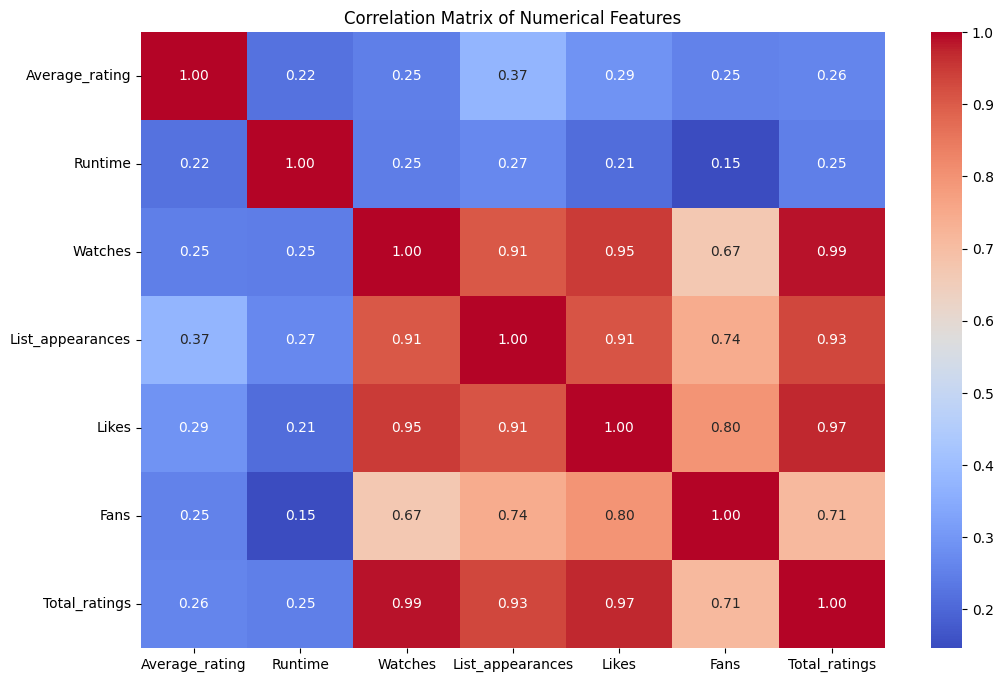

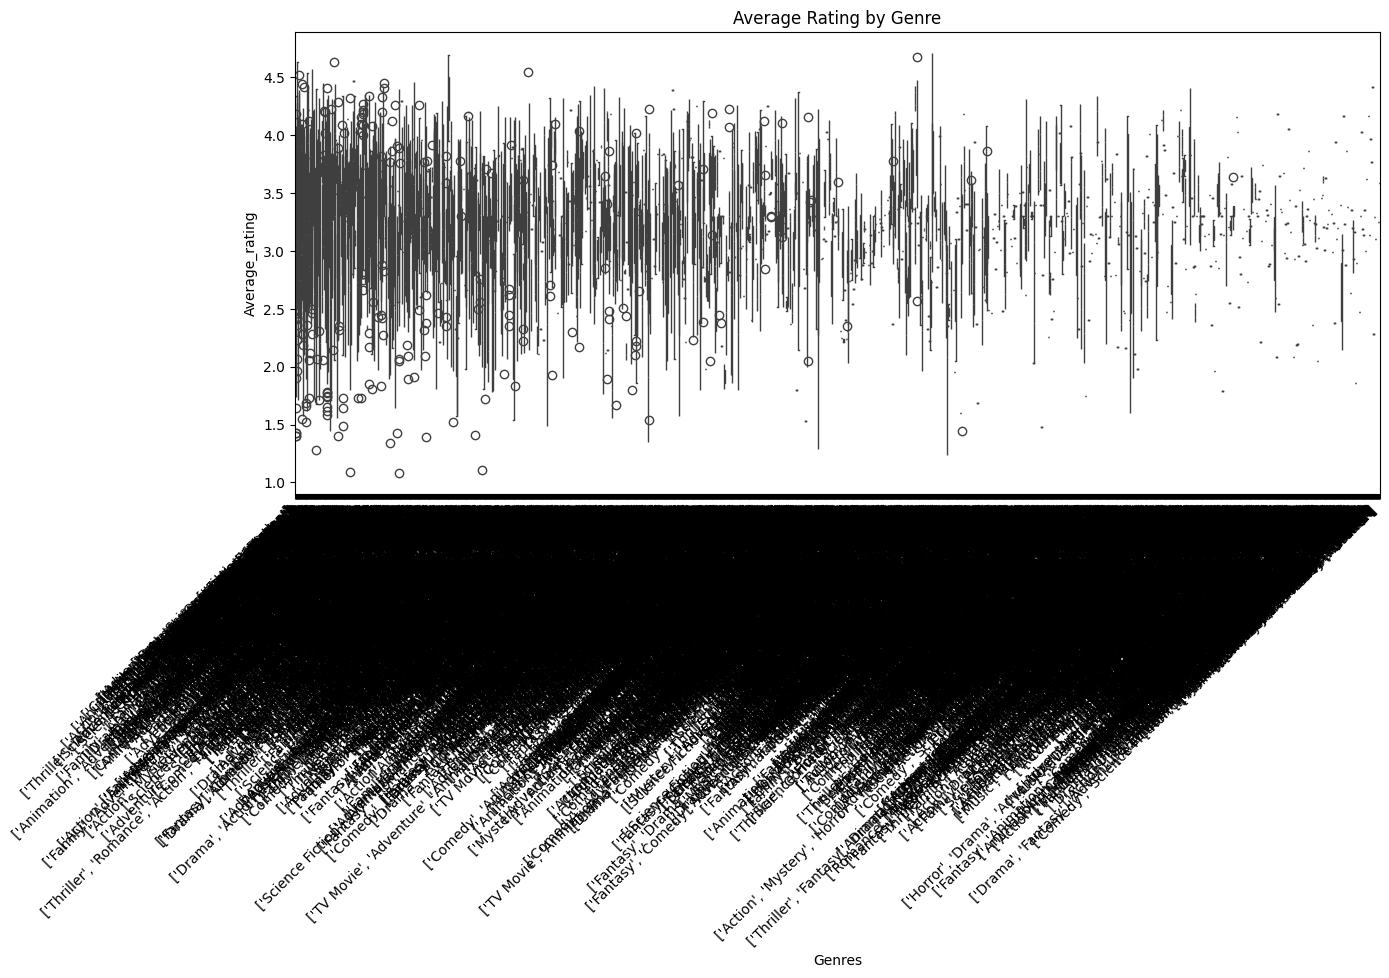

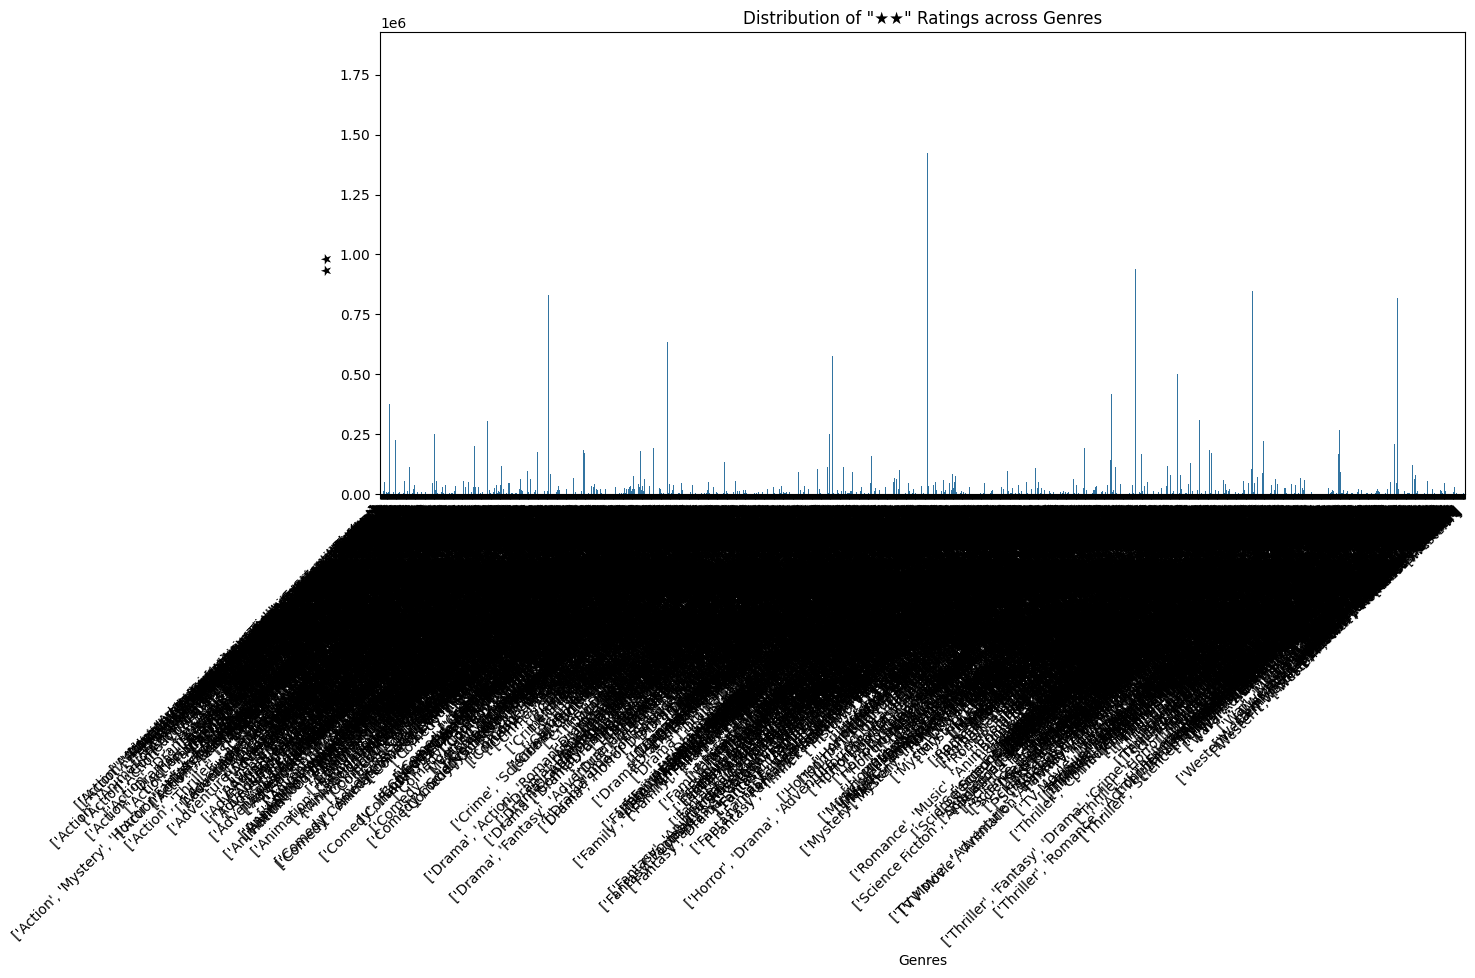

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive Statistics
numerical_cols = ['Average_rating', 'Runtime', 'Watches', 'List_appearances', 'Likes', 'Fans', 'Total_ratings']
descriptive_stats = df_movie[numerical_cols].describe()
print("Descriptive Statistics:\n", descriptive_stats)


# 2. Correlation Matrix and Heatmap
correlation_matrix = df_movie[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# 3. Relationship between Categorical and Numerical Features (Example: Genre vs. Average Rating)
plt.figure(figsize=(14, 6))
sns.boxplot(x='Genres', y='Average_rating', data=df_movie) # Need to handle multiple genres within a movie
plt.xticks(rotation=45, ha='right')
plt.title('Average Rating by Genre')
plt.show()


# 4. Distribution of Ratings across Genres
# Example: Distribution of '★★' ratings across genres
genre_rating_counts = df_movie.groupby('Genres')['★★'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(x='Genres', y='★★', data=genre_rating_counts)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of "★★" Ratings across Genres')
plt.show()

# 5. Observations
# ... (Add your observations based on the results above)

# Task
execute

Here is all the data you need:
"Movie_Data_File.csv"

## Data loading

### Subtask:
Load the movie data from the provided CSV file.


**Reasoning**:
Load the movie data from the provided CSV file into a pandas DataFrame and display the first few rows and the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df_movie = pd.read_csv('Movie_Data_File.csv')
except UnicodeDecodeError:
    try:
        df_movie = pd.read_csv('Movie_Data_File.csv', encoding='latin-1')
    except Exception as e:
        print(f"An error occurred: {e}")
        df_movie = None

if df_movie is not None:
    display(df_movie.head())
    print(df_movie.shape)

,Film_title,Release_year,Director,Cast,Average_rating,Owner_rating,Genres,Runtime,Countries,Original_language,...,★½,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings,Film_URL
0,The Fan,NaN,Eckhart Schmidt,"['Désirée Nosbusch', 'Bodo Staiger', 'Simone B...",3.57,NaN,"['Horror', 'Drama']",92.0,['Germany'],German,...,103,402,525,1660,1950,2646,808,714,9042,https://letterboxd.com/film/the-fan-1982/
1,Mad Max: Fury Road,NaN,George Miller,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...",4.18,4.5,"['Adventure', 'Science Fiction', 'Action']",121.0,"['Australia', 'USA']",English,...,6139,37471,30112,158356,163753,477901,280815,511140,1682389,https://letterboxd.com/film/mad-max-fury-road/
2,Suspiria,NaN,Dario Argento,"['Jessica Harper', 'Stefania Casini', 'Flavio ...",3.93,4.0,['Horror'],99.0,['Italy'],English,...,2710,11006,14397,53427,70309,138742,60628,88628,443757,https://letterboxd.com/film/suspiria/
3,Lost in Translation,NaN,Sofia Coppola,"['Bill Murray', 'Scarlett Johansson', 'Akiko T...",3.79,4.5,"['Drama', 'Comedy', 'Romance']",102.0,"['UK', 'USA']",English,...,11281,45997,46716,155110,166638,314160,122359,193717,1076949,https://letterboxd.com/film/lost-in-translation/
4,Akira,NaN,Katsuhiro Otomo,"['Mitsuo Iwata', 'Nozomu Sasaki', 'Mami Koyama...",4.28,5.0,"['Animation', 'Action', 'Science Fiction']",124.0,['Japan'],Japanese,...,1663,7286,9544,40850,61104,168485,112657,196532,600721,https://letterboxd.com/film/akira/


(10002, 29)


## Data exploration

### Subtask:
Explore the movie data to understand its structure, identify missing values, and examine the distribution of key variables. Determine the data type of each column.


**Reasoning**:
I need to explore the data, identify missing values, examine the distribution of key variables, and determine the data type of each column in the dataframe.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film_title         10002 non-null  object 
 1   Release_year       0 non-null      float64
 2   Director           9992 non-null   object 
 3   Cast               9945 non-null   object 
 4   Average_rating     9421 non-null   float64
 5   Owner_rating       967 non-null    float64
 6   Genres             9978 non-null   object 
 7   Runtime            9992 non-null   float64
 8   Countries          9884 non-null   object 
 9   Original_language  9999 non-null   object 
 10  Spoken_languages   9999 non-null   object 
 11  Description        10000 non-null  object 
 12  Studios            9695 non-null   object 
 13  Watches            10002 non-null  int64  
 14  List_appearances   10002 non-null  int64  
 15  Likes              10002 non-null  int64  
 16  Fans               100

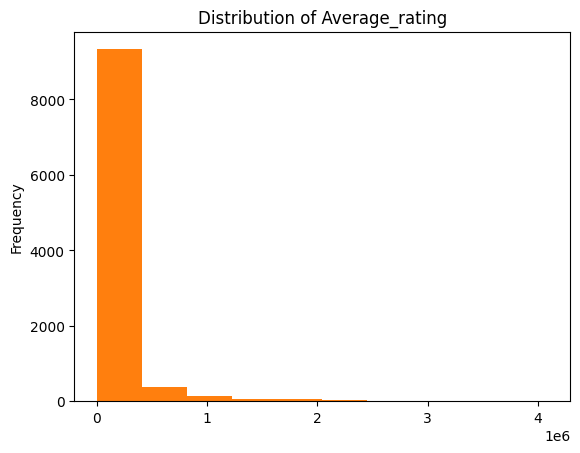

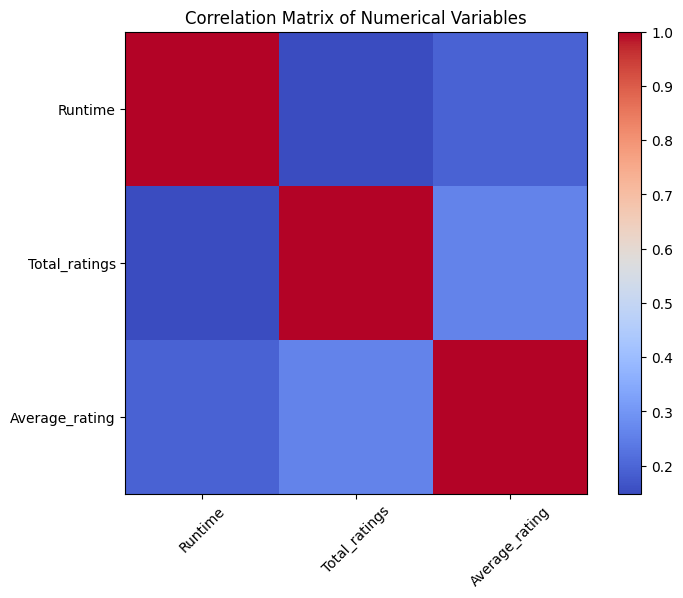

In [2]:
# Display info
df_movie.info()

# Missing values
missing_values = df_movie.isnull().sum()
missing_percentage = (missing_values / len(df_movie)) * 100
print("\nMissing Values Percentage:\n", missing_percentage)

# Descriptive statistics for numerical variables
numerical_cols = ['Runtime', 'Total_ratings', 'Average_rating']  # Add other numerical columns if available
print("\nDescriptive Statistics for Numerical Variables:\n")
for col in numerical_cols:
    if col in df_movie.columns:
        print(f"--- {col} ---")
        print(df_movie[col].describe())
        # Histogram
        df_movie[col].plot(kind='hist', title=f'Distribution of {col}')

# Unique values and frequencies for categorical variables
categorical_cols = ['Genres', 'Countries', 'Original_language', 'Director']  # Add other categorical columns if needed
print("\nUnique Values and Frequencies for Categorical Variables:\n")
for col in categorical_cols:
    print(f"--- {col} ---")
    print(df_movie[col].value_counts().head(10))

# Correlation between numerical variables
print("\nCorrelation Matrix:\n")
correlation_matrix = df_movie[numerical_cols].corr()
print(correlation_matrix)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=45)
plt.yticks(range(len(numerical_cols)), numerical_cols)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Data cleaning

### Subtask:
Clean the movie data by handling missing values, addressing inconsistencies, and removing duplicates.


**Reasoning**:
Drop the 'Release_year' column as it's completely empty, and handle missing values in other relevant columns using imputation or removal, depending on their impact. Convert data types for 'Runtime', 'Total_ratings', and 'Average_rating' to ensure consistency. Address inconsistencies in categorical columns like 'Genres', 'Countries', and 'Original_language'. Remove duplicate rows. Investigate and handle outliers in the 'Runtime' column.



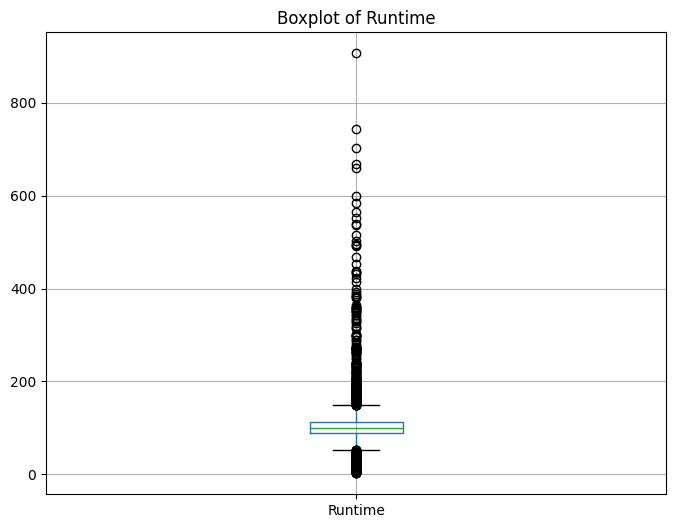

In [3]:
# Drop 'Release_year' column
if 'Release_year' in df_movie.columns:
    df_movie = df_movie.drop('Release_year', axis=1)

# Handle missing values in 'Average_rating', 'Total_ratings', and 'Runtime'
for col in ['Average_rating', 'Total_ratings', 'Runtime']:
    if col in df_movie.columns:
        if df_movie[col].isnull().any():
            # Impute missing values with the median for numerical columns
            df_movie[col] = df_movie[col].fillna(df_movie[col].median())

# Handle inconsistencies in categorical columns
for col in ['Genres', 'Countries', 'Original_language']:
    if col in df_movie.columns:
        df_movie[col] = df_movie[col].astype(str).str.lower()

# Remove duplicate rows
df_movie.drop_duplicates(inplace=True)

# Investigate and handle outliers in 'Runtime'
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df_movie.boxplot(column=['Runtime'])
plt.title('Boxplot of Runtime')
plt.show()

# Cap 'Runtime' outliers at the 95th percentile
if 'Runtime' in df_movie.columns:
    percentile_95 = df_movie['Runtime'].quantile(0.95)
    df_movie['Runtime'] = df_movie['Runtime'].clip(upper=percentile_95)

df_movie_cleaned = df_movie

## Data analysis

### Subtask:
Analyze the cleaned movie data to identify trends, patterns, and correlations.


**Reasoning**:
Analyze the relationship between `Average_rating` and `Total_ratings`, explore the relationship between movie `Genres` and `Average_rating`, investigate the distribution of `Runtime` for different genres, and analyze the impact of `Countries` on `Average_rating`.



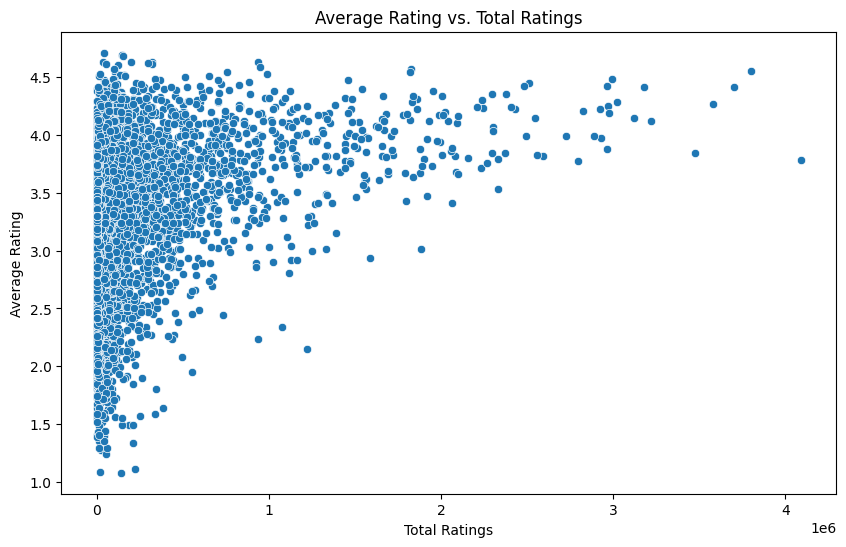

Correlation coefficient between Average Rating and Total Ratings: 0.25826762480414084


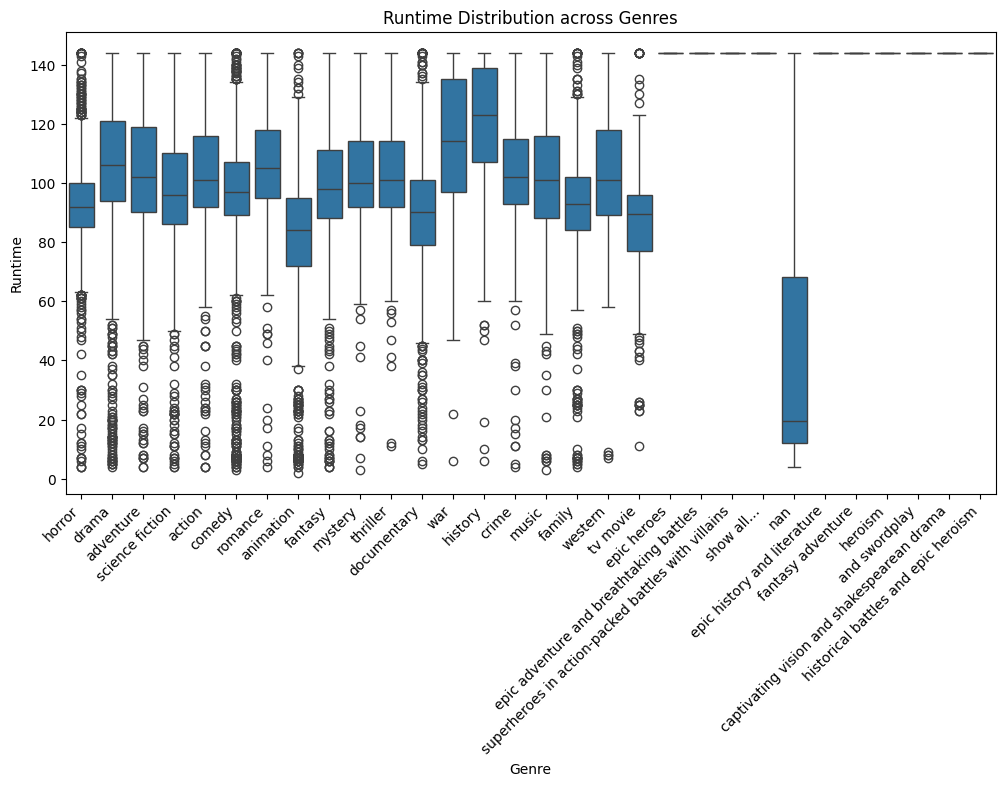

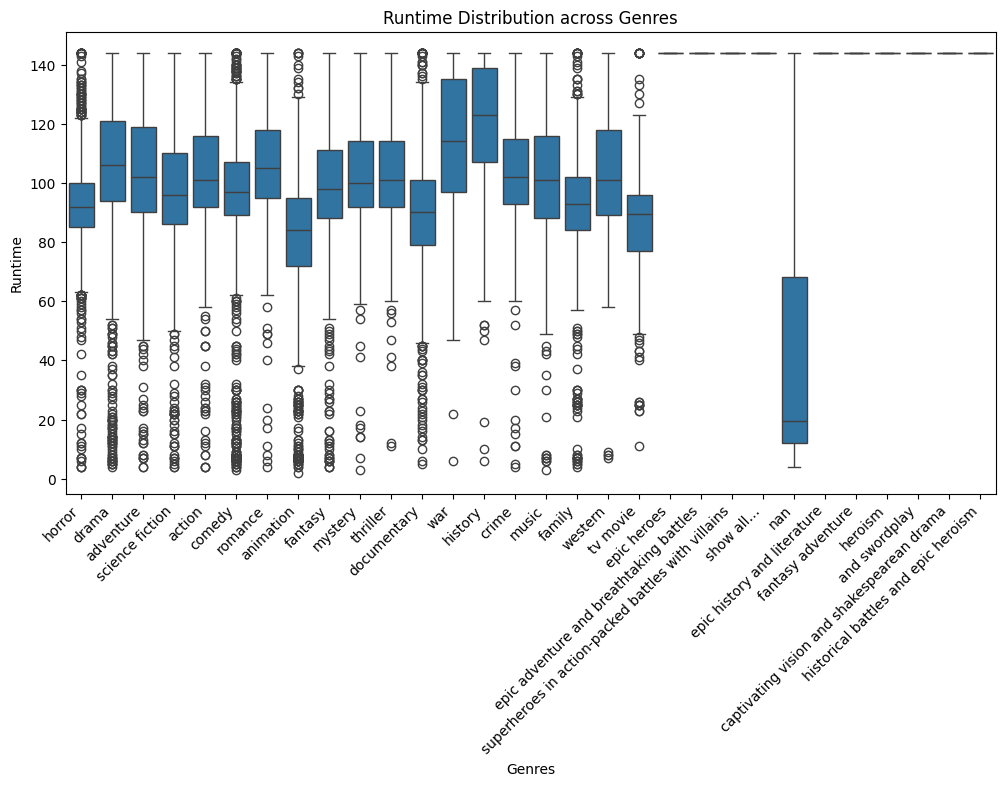

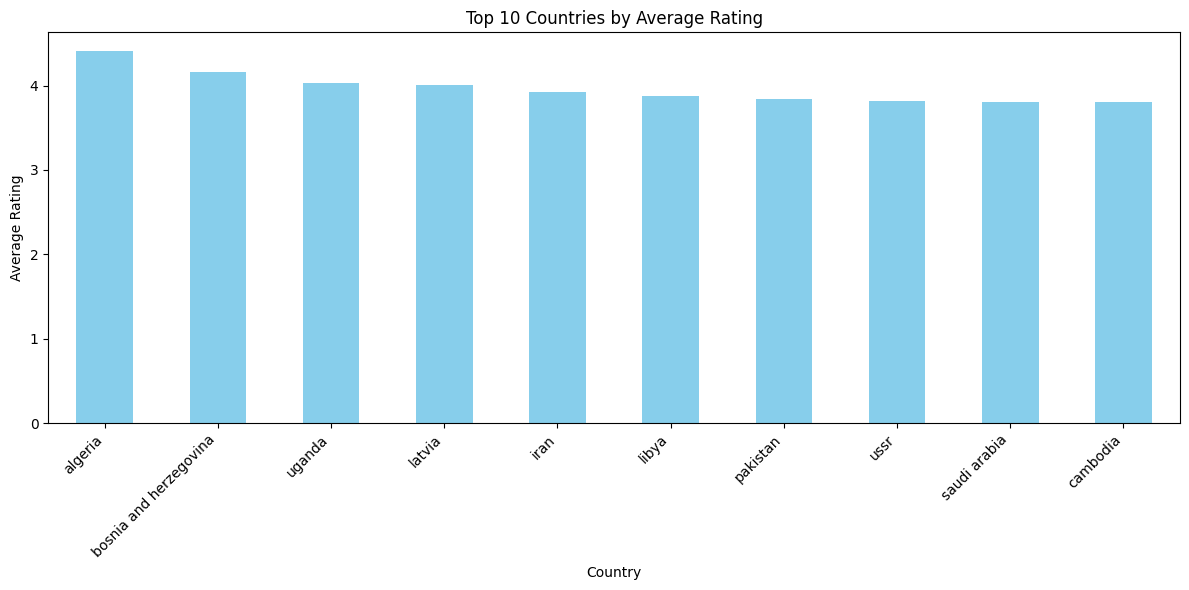

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Relationship between Average_rating and Total_ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_movie_cleaned, x='Total_ratings', y='Average_rating')
plt.title('Average Rating vs. Total Ratings')
plt.xlabel('Total Ratings')
plt.ylabel('Average Rating')
plt.show()

correlation_coefficient = df_movie_cleaned['Average_rating'].corr(df_movie_cleaned['Total_ratings'])
print(f"Correlation coefficient between Average Rating and Total Ratings: {correlation_coefficient}")

# 2. Relationship between Genres and Average_rating
# Preprocess Genres to handle list format
df_movie_cleaned['Genres'] = df_movie_cleaned['Genres'].astype(str).str.strip("[]").str.replace("'", "").str.split(", ")
genre_ratings = []
for index, row in df_movie_cleaned.iterrows():
    for genre in row['Genres']:
        genre_ratings.append({'Genre': genre.strip(), 'Average_rating': row['Average_rating']})
genre_ratings_df = pd.DataFrame(genre_ratings)
average_rating_by_genre = genre_ratings_df.groupby('Genre')['Average_rating'].mean().sort_values(ascending=False).head(10)

# Create a new DataFrame with one row per movie-genre combination for the boxplot
genre_runtime_data = []
for index, row in df_movie_cleaned.iterrows():
    for genre in row['Genres']:
        genre_runtime_data.append([genre, row['Runtime']])

df_genre_runtime = pd.DataFrame(genre_runtime_data, columns=['Genre', 'Runtime'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Runtime', data=df_genre_runtime)  # Use the new DataFrame for the boxplot
plt.xticks(rotation=45, ha='right')
plt.title("Runtime Distribution across Genres")
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Make sure pandas is imported

# ... (Your previous code) ...

# 3. Distribution of Runtime for different genres
# Explode the Genres column to create individual rows for each genre
df_genre_runtime = df_movie_cleaned.explode('Genres')

# Convert 'Genres' column to string type before plotting
df_genre_runtime['Genres'] = df_genre_runtime['Genres'].astype(str)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Genres', y='Runtime', data=df_genre_runtime)
plt.xticks(rotation=45, ha='right')
plt.title("Runtime Distribution across Genres")
plt.show()

# ... (Rest of your code) ...

# 4. Impact of Countries on Average_rating
# Preprocess Countries to handle list format
df_movie_cleaned['Countries'] = df_movie_cleaned['Countries'].astype(str).str.strip("[]").str.replace("'", "").str.split(", ")

country_ratings = []
for index, row in df_movie_cleaned.iterrows():
    for country in row['Countries']:
        country_ratings.append({'Country': country.strip(), 'Average_rating': row['Average_rating']})
country_ratings_df = pd.DataFrame(country_ratings)

average_rating_by_country = country_ratings_df.groupby('Country')['Average_rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
average_rating_by_country.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Average Rating')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code block failed due to unhashable type error when plotting the boxplot. The error arises from the fact that the 'Genres' column contains lists.  I will modify the code to handle this. I will also fix the code for the country analysis.



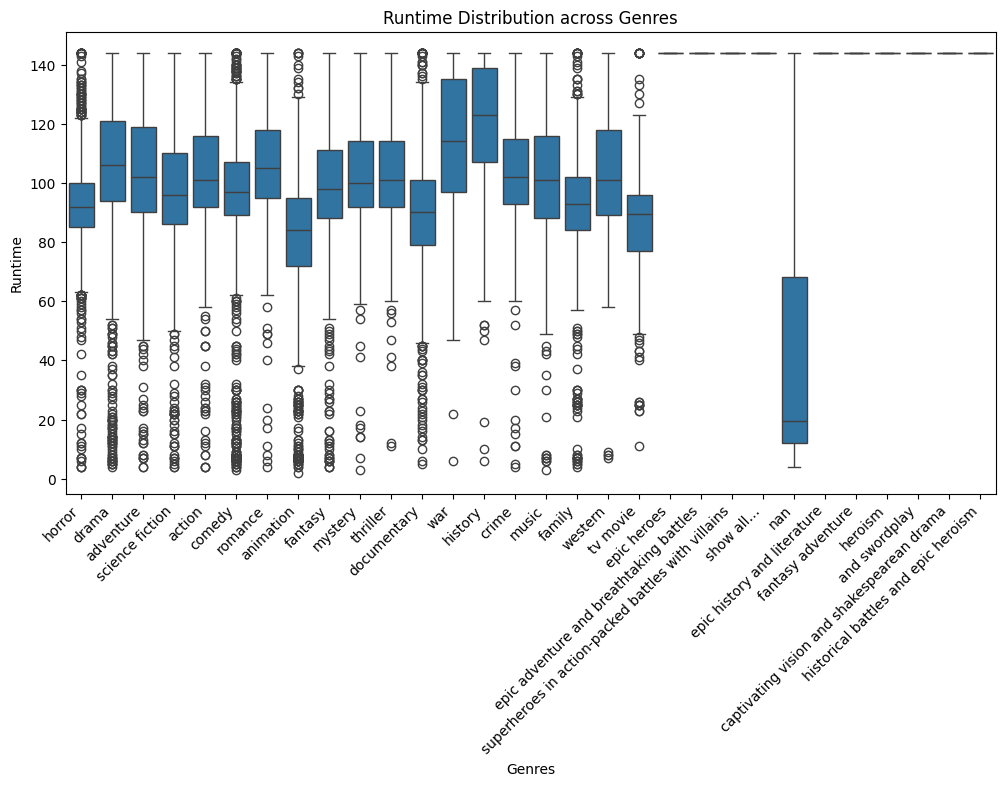

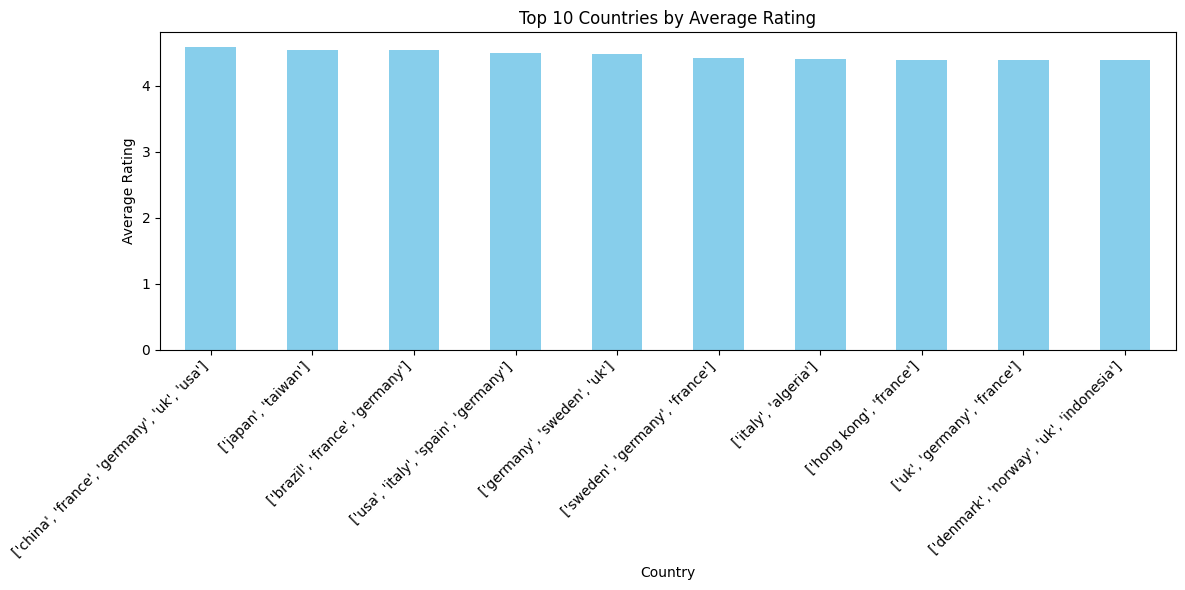

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Relationship between Average_rating and Total_ratings (already done in previous code block)

# 2. Relationship between Genres and Average_rating (already done in previous code block)

# 3. Distribution of Runtime for different genres
# Explode the Genres column
genres_exploded = df_movie_cleaned.explode('Genres')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genres', y='Runtime', data=genres_exploded)
plt.xticks(rotation=45, ha='right')
plt.title("Runtime Distribution across Genres")
plt.show()

# 4. Impact of Countries on Average_rating
# Explode the Countries column
countries_exploded = df_movie_cleaned.explode('Countries')
average_rating_by_country = countries_exploded.groupby('Countries')['Average_rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
average_rating_by_country.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Average Rating')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data visualization

### Subtask:
Create visualizations to represent the findings from the data analysis step.


**Reasoning**:
Create visualizations based on the analysis from the previous step.  Specifically, create a heatmap of correlations between numerical features, and a histogram of the distribution of total ratings.



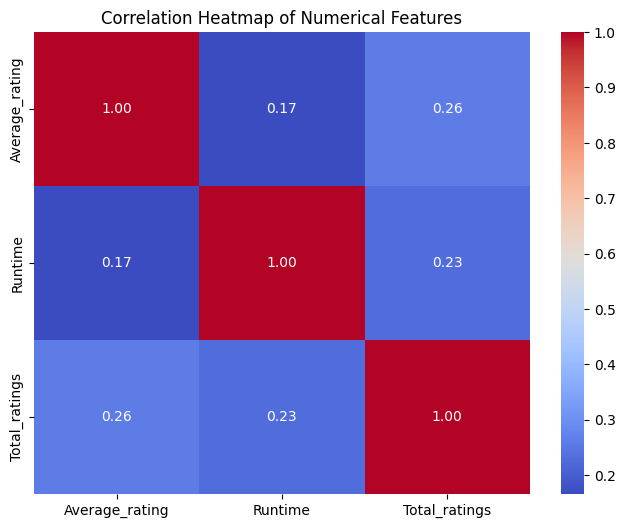

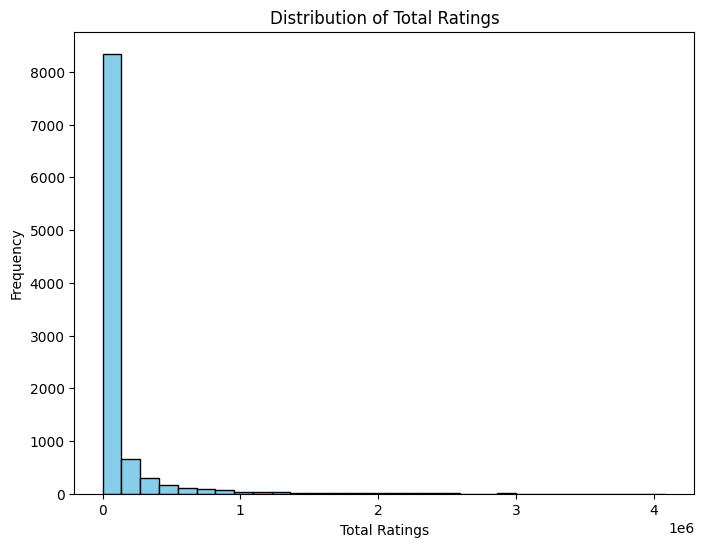

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
numerical_cols = ['Average_rating', 'Runtime', 'Total_ratings']
correlation_matrix = df_movie_cleaned[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Distribution of Total Ratings
plt.figure(figsize=(8, 6))
plt.hist(df_movie_cleaned['Total_ratings'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Total Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Total Ratings')
plt.show()